README
- For this project, I am planning to use two data sources to compare how wine ratings are affected by different wine characteristics. The first data source comes from Kaggle. The data source can be accessed here https://www.kaggle.com/datasets/zynicide/wine-reviews?q=wine&select=winemag-data_first150k.csv. This Wine Review data source contains a csv file that describes the characteristics of win and their respecitve rating. The second data source comes from Target.com where I fetch API from Target.com to retrieve information on the wines that Target.com has. The Target wine webpage is https://www.target.com/s?searchTerm=wine&sortBy=relevance&moveTo=product-list-grid&facetedValue=fwtfrZpahdwZxhfwzZal25lff2zppZb6ubZjkr5nZocuu8Z6brr6Zli9hbZvwqqq. 

In [1]:
import requests
import re
from scipy import stats
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Set the file path
path = "../code/data/"
figpath = '../result/'

Data Analysis and Visualization for Target Data

In [3]:
# Concatenate 4 target wine data to a DataFrame called target_wine and save it as a csv file to the data folder
target_wine_1 = pd.read_csv(path+'target_wine_1.csv')
target_wine_2 = pd.read_csv(path+'target_wine_2.csv')
target_wine_3 = pd.read_csv(path+'target_wine_3.csv')
target_wine_4 = pd.read_csv(path+'target_wine_4.csv')
target_wine_5 = pd.read_csv(path+'target_wine_5.csv')
target_wine = pd.concat([target_wine_1, target_wine_2, target_wine_3, target_wine_4, target_wine_5])
# Save the DataFrame
target_wine.to_csv(path+"target_wine.csv")
target_wine.head()

,tcin,price,Region,Alcohol Percentage,Wine varietals,rating,taste,quality,value
0,52525409,5.00,California,13.5,Cabernet Sauvignon,4.34,3.79,3.97,4.47
1,16194978,8.99,California,13.5,Red Blend,4.67,5.00,5.00,5.00
2,14778671,13.99,California,13.5,Cabernet Sauvignon,4.63,4.11,4.33,4.44
3,79329740,19.99,California,15.5,Cabernet Sauvignon,4.78,5.00,5.00,5.00
4,13299910,6.49,California,11.5,Riesling,4.62,4.83,4.67,4.83


In [4]:
# Check the shape of the target wine data
target_wine.shape

(1200, 9)

In [5]:
target_wine[['rating', 'taste', 'quality', 'value']].describe()

,rating,taste,quality,value
count,1200.000000,1193.000000,1198.000000,1191.000000
mean,3.387542,2.171626,2.214341,2.229043
std,2.034115,2.285904,2.301862,2.321078
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,4.450000,0.000000,1.000000,0.000000
75%,4.830000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


In [6]:
print('Number of wines that do not have a customer ratings:', len(target_wine[target_wine['rating']==0]))
print('Number of wines that do not have secondary ratings:', len(target_wine[target_wine['taste']==0]))

Number of wines that do not have a customer ratings: 305
Number of wines that do not have secondary ratings: 598


/Users/ruitingm/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


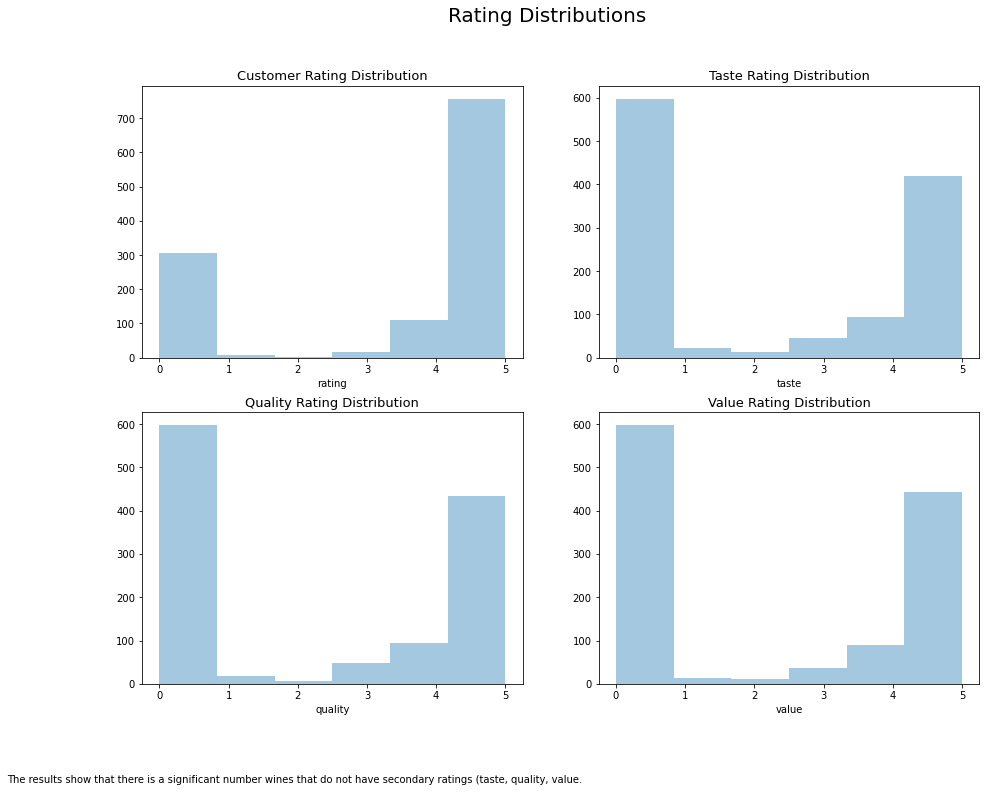

In [24]:
# A subplot that contains 4 different rating distributions
fig, axes = plt.subplots(2,2, figsize=(15,11))
sns.distplot(target_wine['rating'], kde=False, ax=axes[0,0])

# Fill in the rating distrubutions 
plt.suptitle('Rating Distributions', fontsize=20)
axes[0,0].set_title('Customer Rating Distribution', fontsize=13)

sns.distplot(target_wine['taste'], kde=False, ax=axes[0,1])
axes[0,1].set_title('Taste Rating Distribution', fontsize=13)

sns.distplot(target_wine['quality'], kde=False, ax=axes[1,0])
axes[1,0].set_title('Quality Rating Distribution', fontsize=13)

sns.distplot(target_wine['value'], kde=False, ax=axes[1,1])
axes[1,1].set_title('Value Rating Distribution', fontsize=13)

fig.text(0, 0, "The results show that there is a significant number wines that do not have secondary ratings (taste, quality, value.", size='medium')

plt.savefig(figpath+'target_rating_distribution.jpg', bbox_inches = 'tight')

/Users/ruitingm/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Top 10 Wine Varietals in Target')

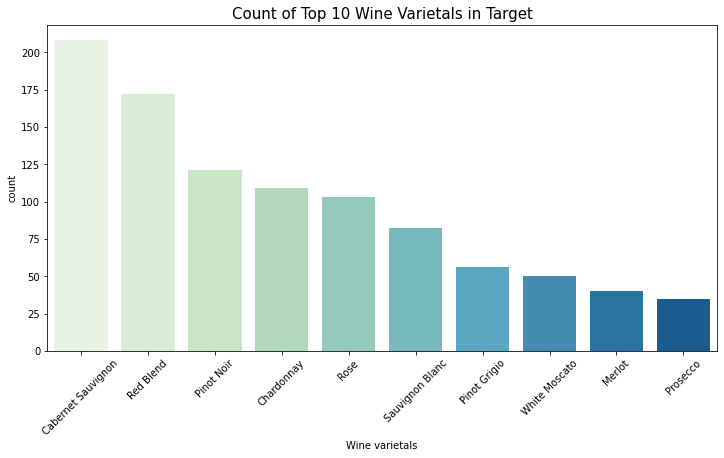

In [8]:
# Find top 10 wine varietals by count
plt.figure(figsize=(12,6))
sns.countplot(target_wine['Wine varietals'], palette='GnBu', order=target_wine['Wine varietals'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)
plt.title('Count of Top 10 Wine Varietals in Target', fontsize=15)
#plt.savefig(figpath+'target_top10_varietals.png')

In [9]:
# Drop the columns that do not have customer ratings
target_wine_with_rating = target_wine[target_wine['rating']!=0]
print("Number of wines that have customer ratings:", len(target_wine_with_rating))

Number of wines that have customer ratings: 895


Text(0.5, 1.0, 'Correlation for Target Wine')

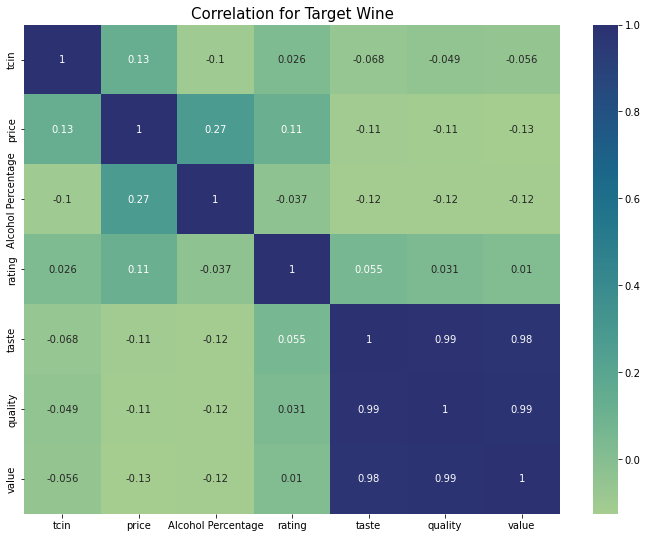

In [10]:
# Heat map disolays the correlation of all numeric variables
plt.figure(figsize=(12, 9))
sns.heatmap(target_wine_with_rating.corr(), cmap='crest', annot=True)
plt.title('Correlation for Target Wine', fontsize=15)
#plt.savefig(figpath+'target_wine_correlation.png')

In [27]:
print('Pearson Correlation for Target Wine Price and Rating:', stats.pearsonr(target_wine_with_rating['price'], target_wine_with_rating['rating'])[0])
print('P-Value for Target Wine Price and Rating:', stats.pearsonr(target_wine_with_rating['price'], target_wine_with_rating['rating'])[1])

Pearson Correlation for Target Wine Price and Rating: 0.11232089229683365
P-Value for Target Wine Price and Rating: 0.0007620731241434451


<Figure size 864x864 with 0 Axes>

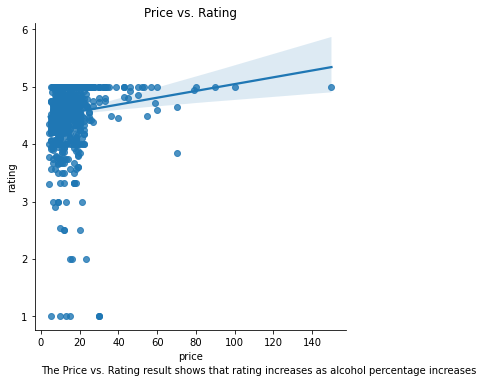

In [23]:
sns.lmplot(data=target_wine_with_rating, x='price', y='rating')
plt.title('Price vs. Rating')
plt.text(0, 0, "The Price vs. Rating result shows that rating increases as alcohol percentage increases")
plt.savefig(figpath+'target_price_vs_rating.jpg', bbox_inches = 'tight')

In [28]:
print('Pearson Correlation for Target Wine Alcohol Percentage and Rating:', stats.pearsonr(target_wine_with_rating['Alcohol Percentage'], target_wine_with_rating['rating'])[0])
print('P-Value for Target Wine Alcohol Percentage and Rating:', stats.pearsonr(target_wine_with_rating['Alcohol Percentage'], target_wine_with_rating['rating'])[1])

Pearson Correlation for Target Wine Alcohol Percentage and Rating: -0.03711077636441532
P-Value for Target Wine Alcohol Percentage and Rating: 0.2674056509502466


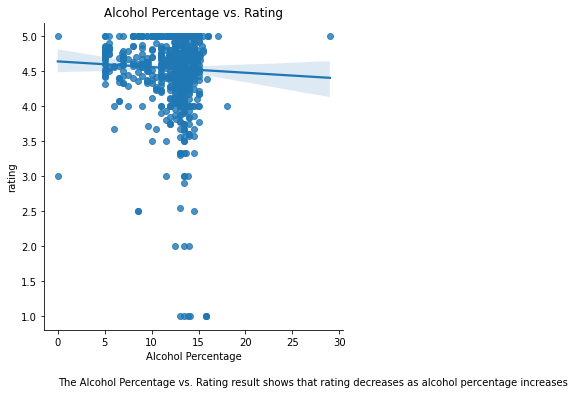

In [25]:
sns.lmplot(data=target_wine_with_rating, x='Alcohol Percentage', y='rating')
plt.title('Alcohol Percentage vs. Rating')
plt.text(0, 0, "The Alcohol Percentage vs. Rating result shows that rating decreases as alcohol percentage increases")
plt.savefig(figpath+'target_alcolpct_vs_rating.jpg', bbox_inches = 'tight')

Data Anlaysis and Visualization for Kaggle Wine Data

In [15]:
k_wine = pd.read_csv(path+'wine_reviews.csv')
k_wine

,country,points,price,province,region_1,region_2,variety,winery
0,US,87,13.0,Washington,Yakima Valley,Columbia Valley,Pinot Gris,Mercer
1,US,88,28.0,California,Livermore Valley,Central Coast,Pinot Blanc,Las Positas
2,US,90,27.0,California,Napa Valley,Napa,Chenin Blanc,Lang & Reed
3,US,91,38.0,Washington,Wahluke Slope,Columbia Valley,Syrah,Fielding Hills
4,US,89,36.0,California,Russian River Valley,Sonoma,Viognier,Kobler
...,...,...,...,...,...,...,...,...
1495,US,90,27.0,California,Russian River Valley,Sonoma,Chardonnay,La Crema
1496,US,85,42.0,Washington,Horse Heaven Hills,Columbia Valley,Nebbiolo,Stottle
1497,US,91,36.0,California,Paso Robles,Central Coast,Grenache,Le Vigne
1498,US,85,22.0,California,Sierra Foothills,Sierra Foothills,Red Blend,Naggiar


/Users/ruitingm/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Wine Points Distribution')

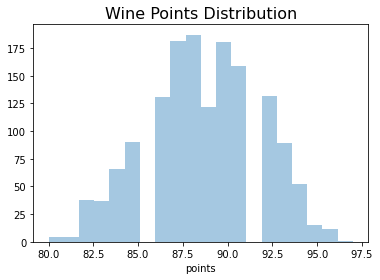

In [16]:
sns.distplot(k_wine['points'], kde=False, bins=20)
plt.title('Wine Points Distribution', fontsize=16)

In [29]:
print('Pearson Correlation for Wine Reviews Price and Points:', stats.pearsonr(k_wine['price'], k_wine['points'])[0])
print('P-Value for Wine Reviews Price and Points:', stats.pearsonr(k_wine['price'], k_wine['points'])[1])

Pearson Correlation for Wine Reviews Price and Points: 0.42193261941951854
P-Value for Wine Reviews Price and Points: 8.237490183619059e-66


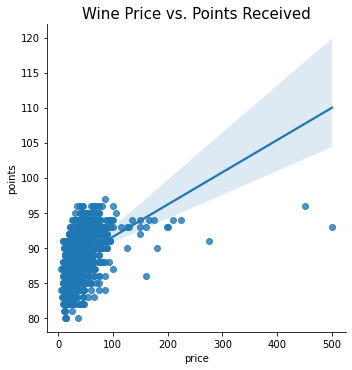

In [26]:
sns.lmplot(data=k_wine, x='price', y='points')
plt.title('Wine Price vs. Points Received', fontsize=15)
#plt.savefig(figpath+'reviews_price_vs_points.jpg', bbox_inches = 'tight')
